# k-means

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install japanize_matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
# 表示する文字サイズを調整
plt.rc("font", size=12)
plt.rc("legend", fontsize=15)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

import warnings
import IPython.display
from IPython.display import Image

warnings.filterwarnings("ignore", category=RuntimeWarning)
np.random.seed(777)

# k-means クラスタリングの例
## サンプルデータを作成
`make_blobs`でサンプルデータを作成し、それに対してクラスタリングを適用します。

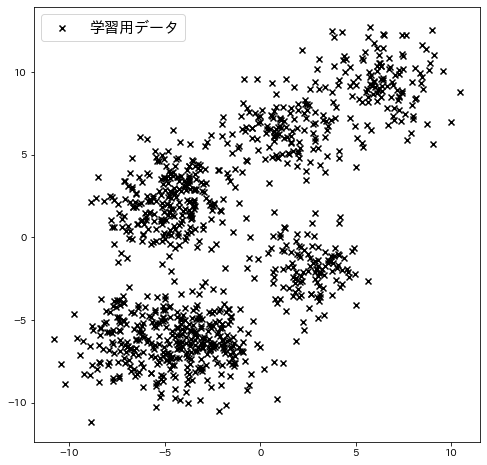

In [4]:
n_samples = 1000
random_state = 117117
n_clusters = 4
X, y = make_blobs(
    n_samples=n_samples, random_state=random_state, cluster_std=1.5, centers=8
)

# k-meansの初期値用のポイント
init = X[np.where(X[:, 1] < -8)][:n_clusters]

# k-meansの初期値をプロット
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c="k", marker="x", label="学習用データ")
plt.legend()
plt.show()

## セントロイドの計算
4回セントロイドを求め直して、4回目できれいにデータが別れていることが確認できます。

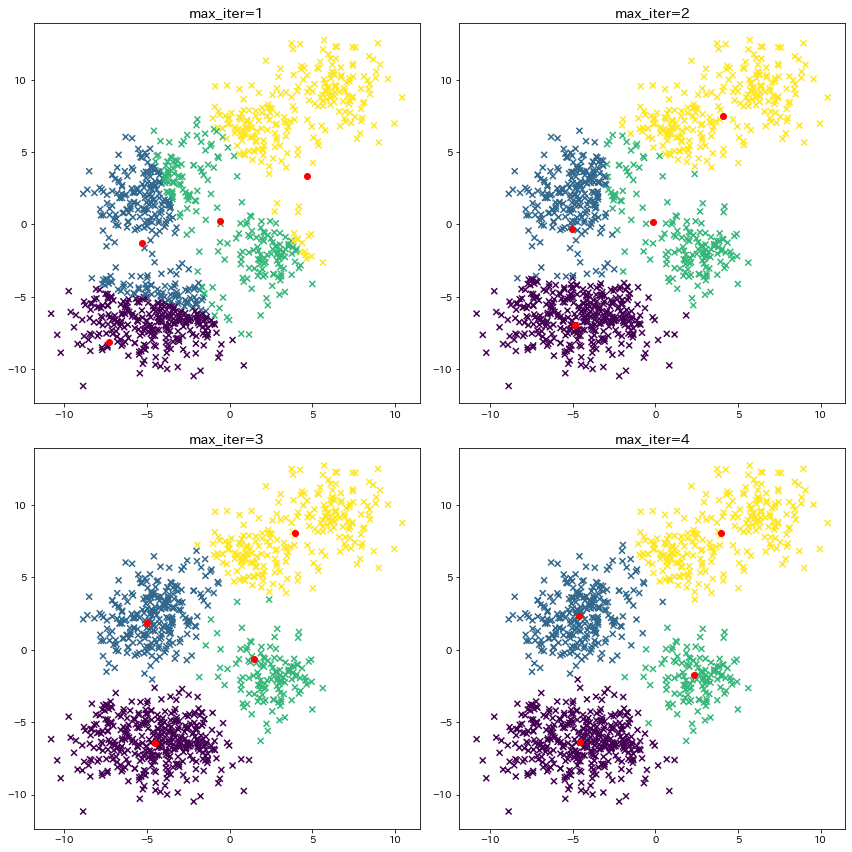

In [5]:
plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    max_iter = 1 + i
    km = KMeans(
        n_clusters=n_clusters, init=init, max_iter=max_iter, n_init=1, random_state=1
    ).fit(X)
    cluster_centers = km.cluster_centers_
    y_pred = km.predict(X)

    plt.title(f"max_iter={max_iter}")
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker="x")
    plt.scatter(
        cluster_centers[:, 0],
        cluster_centers[:, 1],
        c="r",
        marker="o",
        label="クラスタのセントロイド",
    )
plt.tight_layout()
plt.show()

# クラスタが重なり合っている場合
クラスタのデータが重なり合っている時の、クラスタリング結果を確認します。

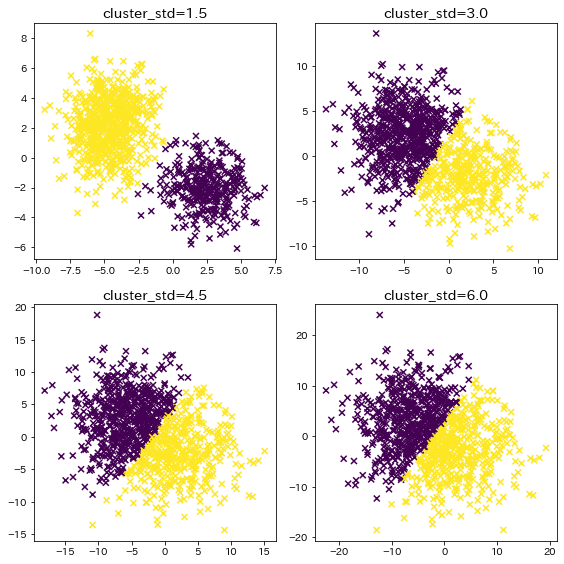

In [6]:
n_samples = 1000
random_state = 117117

plt.figure(figsize=(8, 8))
for i in range(4):
    cluster_std = (i + 1) * 1.5
    X, y = make_blobs(
        n_samples=n_samples, random_state=random_state, cluster_std=cluster_std
    )
    y_pred = KMeans(n_clusters=2, random_state=random_state, init="random").fit_predict(
        X
    )
    plt.subplot(2, 2, i + 1)
    plt.title(f"cluster_std={cluster_std}")
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker="x")

plt.tight_layout()
plt.show()

# kの数の影響

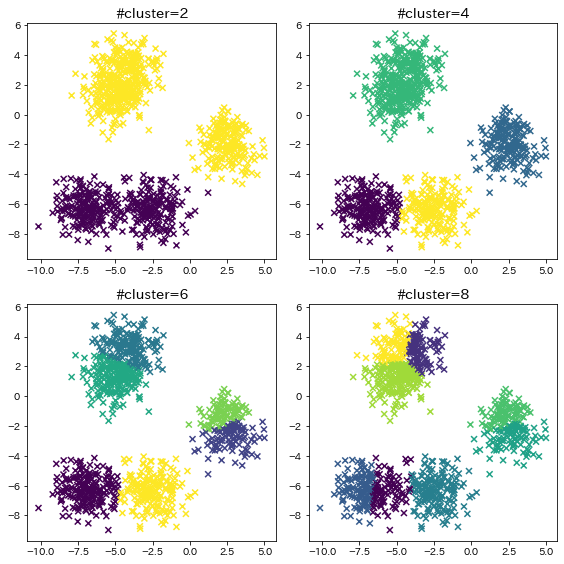

In [7]:
n_samples = 1000
random_state = 117117

plt.figure(figsize=(8, 8))
for i in range(4):
    n_clusters = (i + 1) * 2
    X, y = make_blobs(
        n_samples=n_samples, random_state=random_state, cluster_std=1, centers=5
    )
    y_pred = KMeans(
        n_clusters=n_clusters, random_state=random_state, init="random"
    ).fit_predict(X)
    plt.subplot(2, 2, i + 1)
    plt.title(f"#cluster={n_clusters}")
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker="x")

plt.tight_layout()
plt.show()